In [85]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
def splitBorder(nodes, splits, closed=False):
    N = nodes.shape[0]-1
    if type(splits) == int:
        splits = [splits]*N
    if len(splits) < N:
        return None
    n = sum(splits[:N])
    if not closed:
        n += 1
    res = np.empty((n, 2))
    if not closed:
        res[-1]=nodes[-1]
    s = 0
    for i in range(N):
        res[s:s+splits[i], 0] = \
        np.linspace(nodes[i,0], nodes[i+1,0], splits[i]+1)[:-1]
        res[s:s+splits[i], 1] = \
        np.linspace(nodes[i,1], nodes[i+1,1], splits[i]+1)[:-1]
        s += splits[i]
    return res

In [73]:
def splitArc(c, r, splits, angles=(0,90)):
    alpha = np.radians(np.linspace(angles[0], angles[1], splits))
    return np.vstack((r*np.cos(alpha)+c[0], r*np.sin(alpha)+c[1])).T

In [141]:
L1, L2, H, h, R = 10., 10., 4., 2., 2.

In [102]:
pts = np.array([[L1, H],
                [0., H],
                [0., 0.],
                [L1+R+L2, 0.],
                [L1+R+L2, h],
                [L1+R, h]
               ])
splits = [15, 10, 30, 5, 15]

In [103]:
brd = splitBorder(pts, splits, closed=True)

In [104]:
arc = splitArc((L1+R, H), R, 10, angles=(270, 180))[:-1]

(-1.1, 23.1, -0.2, 4.2)

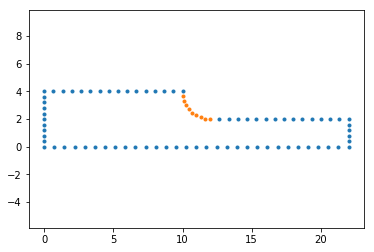

In [105]:
plt.plot(brd[:,0], brd[:,1], '.')
plt.plot(arc[:,0], arc[:,1], '.')
plt.axis('equal')

In [106]:
Nodes = np.vstack((brd, arc))

((10, 30), (10, 30))

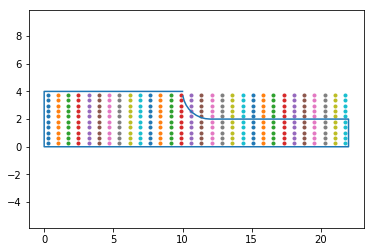

In [140]:
L = L1+R+L2
delta = 0.25

ll = np.linspace(delta, L-delta, 30)
hh = np.linspace(delta, H-delta, 10)

X, Y = np.meshgrid(ll, hh)
plt.plot(X, Y, '.')
plt.plot(Nodes[:,0], Nodes[:,1])
plt.axis('equal')
X.shape, Y.shape

In [146]:
inner = np.vstack((X.ravel(), Y.ravel())).T
inner.shape

(300, 2)

In [147]:
delta2 = 0.25

In [148]:
mask1 = np.sum((inner - np.array([L1+R, H]))**2, axis=1) > (R+delta2)**2

In [149]:
mask2 = np.logical_not((inner[:,0] > L1+R) & (inner[:,1] > h))

In [150]:
inner = inner[mask1 & mask2]
inner.shape

(218, 2)

(-1.1, 23.1, -0.2, 4.2)

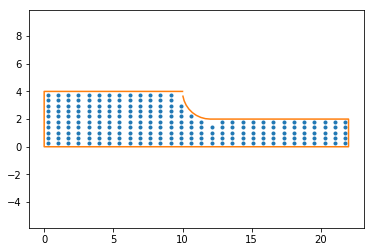

In [151]:
plt.plot(inner[:,0], inner[:,1], '.')
plt.plot(Nodes[:,0], Nodes[:,1])
plt.axis('equal')

In [152]:
import scipy.spatial

In [153]:
Nodes = np.vstack((Nodes, inner))

In [154]:
tri = scipy.spatial.Delaunay(Nodes)

In [156]:
Elems = tri.simplices.copy()
Elems.shape

(541, 3)

(-1.1, 23.1, -0.2, 4.2)

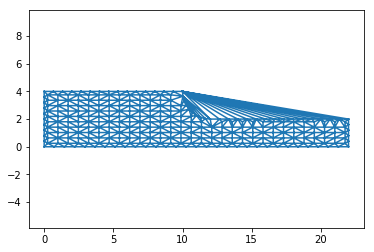

In [157]:
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.axis('equal')

In [161]:
Coords = Nodes[Elems]
e_centers = np.mean(Coords, axis=1)
e_centers.shape

(541, 2)

(-1.1, 23.1, -0.2, 4.2)

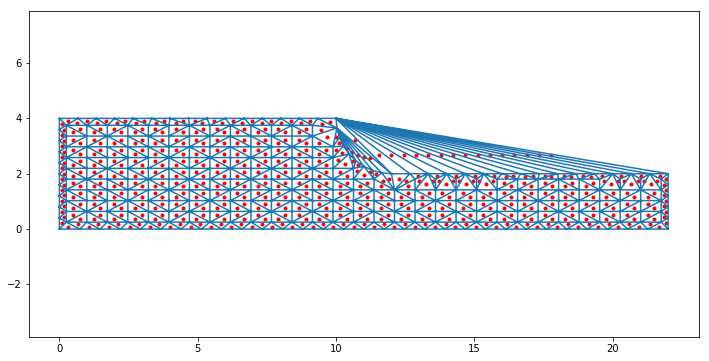

In [162]:
plt.figure(figsize=(12, 6))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
plt.scatter(e_centers[:,0], e_centers[:,1], marker='.', color='r')
plt.axis('equal')

In [164]:
mask1 = np.sum((e_centers - np.array([L1+R, H]))**2, axis=1) > (R)**2

In [165]:
mask2 = np.logical_not((e_centers[:,0] > L1+R) & (e_centers[:,1] > h))

In [166]:
Elems = Elems[mask1 & mask2]

(-1.1, 23.1, -0.2, 4.2)

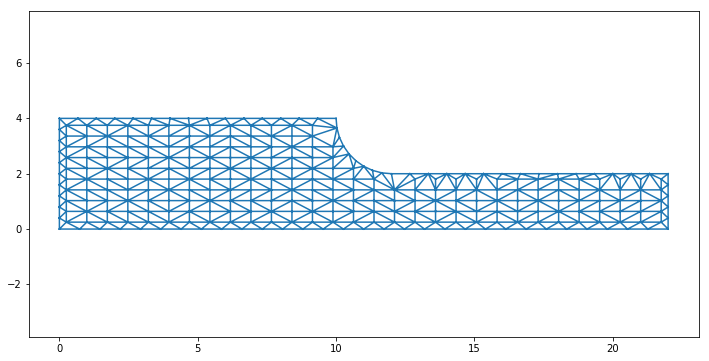

In [167]:
plt.figure(figsize=(12, 6))
plt.triplot(Nodes[:,0], Nodes[:,1], Elems)
#plt.scatter(e_centers[:,0], e_centers[:,1], marker='.', color='r')
plt.axis('equal')

In [176]:
def triarea(a, b, c):
    ab = b - a
    ac = c - a
    return 0.5 * (ab[:,0]*ac[:,1]-ab[:,1]*ac[:,0])

In [181]:
Coords = Nodes[Elems]
A = triarea(Coords[:,0], Coords[:,1], Coords[:,2])
A.shape

(518,)

In [182]:
np.sum(A)

64.87433280199525

In [184]:
# b = Nodes[[1,2,0], 1] - Nodes[[2,0,1],1]

b = Coords[:,[1,2,0],1] - Coords[:,[2,0,1],1]
b

array([[-0.38888889,  0.19444444,  0.19444444],
       [-0.19444444, -0.20555556,  0.4       ],
       [ 0.17222222, -0.38888889,  0.21666667],
       ...,
       [-0.38888889,  0.38888889,  0.        ],
       [ 0.38888889, -0.38888889,  0.        ],
       [ 0.38888889,  0.        , -0.38888889]])

In [185]:
# c = Nodes[[2,0,1], 0] - Nodes[[1,2,0],0]

c = Coords[:,[2,0,1],0] - Coords[:,[1,2,0],0]
c

array([[ 0.        , -0.25      ,  0.25      ],
       [ 0.25      , -0.25      ,  0.        ],
       [ 0.25      ,  0.        , -0.25      ],
       ...,
       [-0.74137931,  0.        ,  0.74137931],
       [ 0.        ,  0.74137931, -0.74137931],
       [-0.74137931,  0.74137931,  0.        ]])

In [189]:
coef = 1 / (2*A)
coef.shape

(518,)

In [190]:
z = np.zeros_like(b[:,0])


#B1 = np.array([b[0], 0, b[1], 0, b[2], 0])
B1 = np.stack((b[:,0], z, b[:,1], z, b[:,2], z), axis=1)
B2 = np.stack((z, c[:,0], z, c[:,1], z, c[:,2]), axis=1)
B3 = np.stack((c[:,0], b[:,0], c[:,1], b[:,1], c[:,2], b[:,2]), axis=1)

B = np.stack((B1, B2, B3), axis=1)*coef.reshape(-1, 1, 1)
B.shape

(518, 3, 6)

In [191]:
E = 2e7 # Н/см^2
mu = 0.25
t = 0.5 # см
p = 44e3 # Н/см^2

In [194]:
D = E/(1-mu**2)*np.array([[1,mu,0],[mu,1,0],[0,0,0.5*(1-mu)]])
D

array([[21333333.33333333,  5333333.33333333,        0.        ],
       [ 5333333.33333333, 21333333.33333333,        0.        ],
       [       0.        ,        0.        ,  8000000.        ]])

In [195]:
BT = np.transpose(B, axes=(0,2,1))
BT.shape

(518, 6, 3)

In [198]:
Ke = np.matmul(np.matmul(BT, D), B)*t*A.reshape(-1, 1, 1)
Ke.shape

(518, 6, 6)